# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes.
2. No, it can be indefinitely months.
3. Yes, because we give 1-5 as the final answer.
4. No.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. split the data set into training set, validation set and test set.
2. Processing the data
3. training the model.
4. Assess the model's performance on the validation set, adjust hyperparameters, such as learning rates, regularization strengths, or network architectures, based on the model's performance on the validation set.
5. After finalizing the model and hyperparameters, assess its performance on the test set, which represents truly unseen data.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting refers to a model that can neither model the training data nor generalize to new data.

Signs to Look Out For: High training error: The model's performance on the training data is not good, as it cannot fit the data well.

Overfitting refers to a model that models the training data too well.

Signs to Look Out For: Low training error: The model's performance on the training data is excellent, often achieving near-perfect accuracy.


### K Nearest Neighbors

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

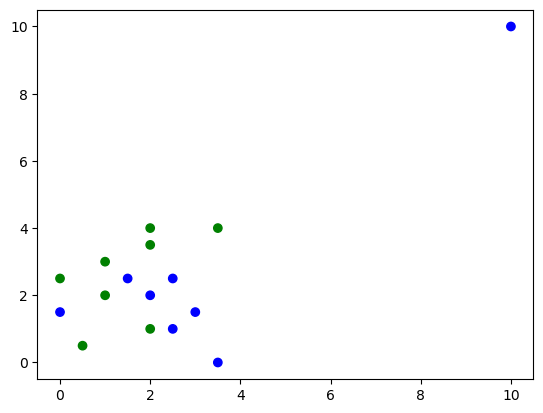

In [12]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [13]:
from scipy import stats

z_scores = np.abs(stats.zscore(data["Attribute A"]))

# Set a threshold for considering data points as outliers (e.g., z-score greater than 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
cleaned_data = {
    "Attribute A": [data["Attribute A"][i] for i in range(len(data["Attribute A"])) if i not in outlier_indices],
    "Attribute B": [data["Attribute B"][i] for i in range(len(data["Attribute B"])) if i not in outlier_indices],
    "Class": [data["Class"][i] for i in range(len(data["Class"])) if i not in outlier_indices],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

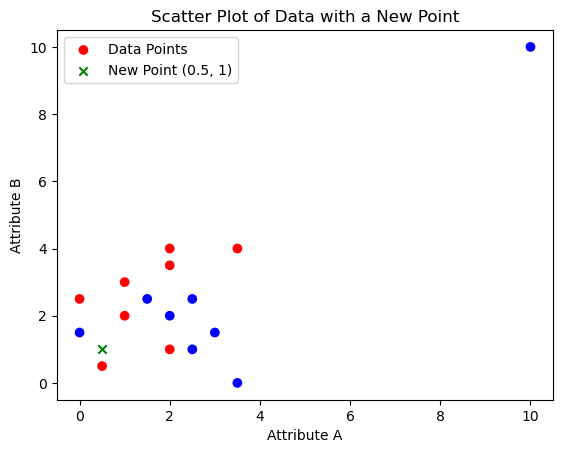

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

# Define colors for each class
colors = np.array(['b', 'r'])

# Scatter plot with colors based on class labels
plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]], label="Data Points")
plt.scatter(0.5, 1, c='g', marker='x', label="New Point (0.5, 1)")

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot of Data with a New Point")
plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

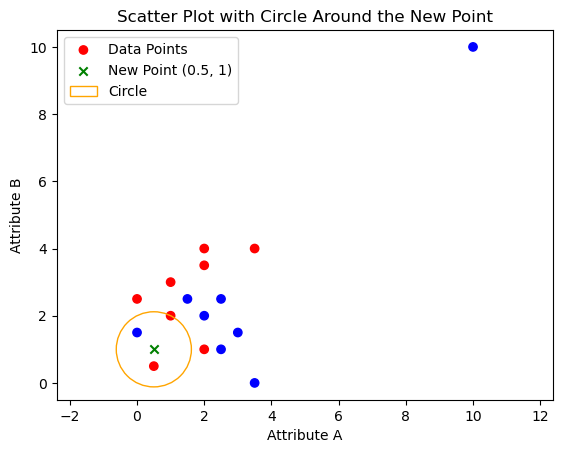

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def plot_circle_around_point(data, new_point):
    # Calculate the Euclidean distances to all points in the dataset
    distances = [euclidean_distance(new_point, (data["Attribute A"][i], data["Attribute B"][i])) for i in range(len(data["Attribute A"]))]

    # Find the indices of the 3 closest points
    closest_indices = np.argsort(distances)[:3]

    # Calculate the distance to the farthest of the 3 closest points
    farthest_distance = distances[closest_indices[-1]]

    # Plot the data points and the new point
    plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]], label="Data Points")
    plt.scatter(new_point[0], new_point[1], c='g', marker='x', label="New Point (0.5, 1)")

    # Plot a circle centered around the new point
    circle = plt.Circle(new_point, farthest_distance, color='orange', fill=False, label="Circle")
    plt.gca().add_artist(circle)

    plt.xlabel("Attribute A")
    plt.ylabel("Attribute B")
    plt.title("Scatter Plot with Circle Around the New Point")
    plt.legend()
    plt.axis('equal')  # Set equal aspect ratio
    plt.show()

# Coordinates of the new point
new_point = (0.5, 1)

# Call the function to plot the circle around the new point
plot_circle_around_point(data, new_point)


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [16]:
def majority_class_of_closest_points(closest_points):
    # Initialize counters for each class
    class_counts = {0: 0, 1: 0}

    # Count the occurrences of each class among the closest points
    for point in closest_points:
        class_counts[data["Class"][data["Attribute A"].index(point[0])]] += 1

    # Determine the majority class (if there's a tie, choose class 0 as the default)
    majority_class = max(class_counts, key=class_counts.get)
    return majority_class

# Get the 3 closest points to the new point
closest_points = n_closest_to(location, 3)

# Determine the majority class among the closest points
majority_class = majority_class_of_closest_points(closest_points)

print("The majority class for the new point is:", majority_class)


NameError: name 'n_closest_to' is not defined

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [ ]:
# Initialize a counter for correct classifications
correct_classifications = 0

# Iterate through each point in the dataset
for i in range(len(data["Attribute A"])):
    # Define the current test point
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    true_class = data["Class"][i]

    # Create a training set by excluding the current test point
    training_data = {
        "Attribute A": [data["Attribute A"][j] for j in range(len(data["Attribute A"])) if j != i],
        "Attribute B": [data["Attribute B"][j] for j in range(len(data["Attribute B"])) if j != i],
        "Class": [data["Class"][j] for j in range(len(data["Class"])) if j != i],
    }

    # Calculate the radius for the circle based on the training data
    location = test_point
    radius = euclidean_distance(location, n_closest_to(location, 3)[-1])

    # Determine the majority class for the test point based on the training data
    closest_points = n_closest_to(location, 3)
    majority_class = majority_class_of_closest_points(closest_points)

    # Check if the majority class matches the true class
    if majority_class == true_class:
        correct_classifications += 1

# Calculate the testing accuracy
accuracy = correct_classifications / len(data["Attribute A"])
print("Overall Testing Accuracy (LOOCV):", accuracy)


NameError: name 'n_closest_to' is not defined